### Introduction

In the following notebook, I will be exploring the listings data set to find potential relationships of interest.

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

#Set Visualization preferences
plt.style.use('bmh')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


**Read in data**

In [3]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Data\02_Cleaned'

#Write file
df = pd.read_csv(path + '/2020_0520_Listings_Cleaned.csv', index_col=0,
                parse_dates=['host_since','last_review'])

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (104833, 84)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_acceptance_rate,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_total_listings_count,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_maximum_nights,maximum_minimum_nights,maximum_nights,maximum_nights_avg_ntm,minimum_maximum_nights,minimum_minimum_nights,minimum_nights,minimum_nights_avg_ntm,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,smart_location,space,street,summary,transit,weekly_price,zipcode
0,Full access to patio and backyard shared wit...,3,TV Cable TV Internet Wifi Kitchen Pets liv...,25,106,43,58,1.0,Real Bed,1.0,2.0,1,1,0,0,3 weeks ago,moderate,San Francisco,100.0,New update the house next door is under const...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,98.0,1.0,1169,1.0,1.0,1.0,San Francisco California United States,Holly,Duboce Triangle,90.0,within an hour,2008-07-31,1.0,email phone facebook reviews kba,No Pets even visiting guests for a short t...,958,1.0,A family of 4 lives upstairs with their dog N...,1.0,2020-03-13,37.76931,STR 0001256,-122.43386,1125,1,1125,1125.0,1125,1,1,1.0,4200.0,Bright Modern Garden Unit 1BR 1B,Quiet cul de sac in friendly neighborhood St...,Western Addition,Due to the fact that we have children and a do...,240,56,170.0,Apartment,0.0,0.0,1.0,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.84,Entire home apt,100.0,San Francisco CA,Newly remodeled modern and bright garden uni...,San Francisco CA United States,New update the house next door is under const...,Public Transportation is 1 2 block away Ce...,1120.0,94117
1,Our deck garden gourmet kitchen and extensiv...,5,Internet Wifi Kitchen Heating Family kid fri...,0,0,0,0,1.0,Real Bed,2.0,3.0,1,1,0,0,2 weeks ago,strict 14 with grace period,San Francisco,100.0,We live in a large Victorian house on a quiet ...,0.0,2009-05-03,2,Philip English transplant to the Bay Area and...,81.0,1.0,8904,1.0,0.0,2.0,San Francisco California United States,Philip And Tania,Bernal Heights,100.0,within a day,2009-03-02,2.0,email phone reviews kba work ema...,Please respect the house the art work the fu...,5858,0.0,NaN,1.0,2017-08-06,37.74511,NaN,-122.42102,60,30,60,60.0,60,30,30,30.0,5500.0,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,111,0,235.0,Apartment,0.0,0.0,1.0,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.83,Entire home apt,NaN,San Francisco CA,We live in a large Victorian house on a quiet ...,San Francisco CA United States,NaN,The train is two blocks away and you can stop ...,1600.0,94110
2,NaN,2,TV Internet Wifi Kitchen Free street parking...,30,365,60,90,4.0,Real Bed,1.0,1.0,9,0,9,0,5 months ago,strict 14 with grace period,San Francisco,50.0,Nice and good public transportation 7 minute...,12.0,2009-08-31,1,7 minutes walk to UCSF hospital school campu...,86.0,1.0,21994,1.0,0.0,10.0,San Francisco California United States,Aaron,Cole Valley,100.0,within an hour,2009-06-17,10.0,email phone reviews jumio govern...,No party No smoking not for any kinds of smo...,7918,0.0,NaN

**Variable Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104833 entries, 0 to 7932
Data columns (total 84 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   access                                        65956 non-null   object        
 1   accommodates                                  104833 non-null  int64         
 2   amenities                                     104833 non-null  object        
 3   availability_30                               104833 non-null  int64         
 4   availability_365                              104833 non-null  int64         
 5   availability_60                               104833 non-null  int64         
 6   availability_90                               104833 non-null  int64         
 7   bathrooms                                     104692 non-null  float64       
 8   bed_type                                      104833 non

**View data description**

In [6]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,104833.0,3.155514e+00,1.912261e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
availability_30,104833.0,1.023421e+01,1.146587e+01,0.00000,0.000000e+00,5.000000e+00,2.100000e+01,3.000000e+01
availability_365,104833.0,1.553914e+02,1.320901e+02,0.00000,2.600000e+01,1.270000e+02,2.880000e+02,3.650000e+02
availability_60,104833.0,2.389618e+01,2.268816e+01,0.00000,0.000000e+00,1.800000e+01,4.500000e+01,6.000000e+01
availability_90,104833.0,3.941996e+01,3.377281e+01,0.00000,3.000000e+00,3.500000e+01,7.200000e+01,9.000000e+01
bathrooms,104692.0,1.384452e+00,8.995435e-01,0.00000,1.000000e+00,1.000000e+00,1.500000e+00,1.400000e+01
bedrooms,104794.0,1.340678e+00,9.370583e-01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01
beds,104620.0,1.744657e+00,1.192847e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01
calculated_host_listings_count,104833.0,2.474455e+01,6.010639e+01,1.00000,1.000000e+00,2.000000e+00,1.000000e+01,3.010000e+02
calculated_host_listings_count_entire_homes,104833.0,2.035331e+01,5.822700e+01,0.00000,0.000000e+00,1.000000e+00,2.000000e+00,3.010000e+02


### Exploratory Data Analysis

#### Price

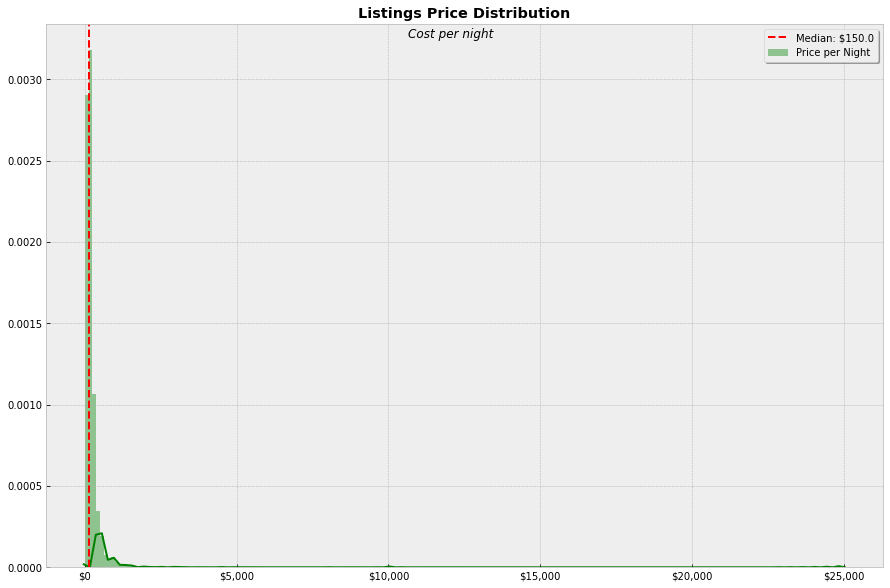

In [7]:
#Set figure
f, ax = plt.subplots(figsize = (15,10))

#Plot hist of price variable
j = sns.distplot(df.price, bins=200,ax = ax, color = 'green', label = 'Price per Night')

###Set Plot Aesthetics###
#Titles
j.set_title('Listings Price Distribution', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

#PLot price median
median = df.price.median()
plt.axvline(median, color='r', linestyle='--', label = 'Median: ${}'.format(round(median)))

#legend
plt.legend(shadow = True, )

Airbnb offers a service known as Airbnb Luxe which offers pristine, expertly designed homes with luxury amenities, services, and a dedicated trip designer. This would explain the extreme rental prices for a one night stay

#### Prices by time

**Prep data**

In [15]:
#Subset target with last_review date
time = df.loc[:,['last_review','price']]

#Extract time data from last_review
time['year'] = df['last_review'].dt.year
time['month']= df['last_review'].dt.month_name()
time['weekday']= df['last_review'].dt.day_name()

# #Set last review as index
# time.set_index('last_review', inplace = True)

#Check
time.head(15)

,last_review,price,year,month,weekday
0,2020-03-13,170.0,2020.0,March,Friday
1,2017-08-06,235.0,2017.0,August,Sunday
2,2020-03-06,65.0,2020.0,March,Friday
3,2018-09-12,65.0,2018.0,September,Wednesday
4,2019-06-28,703.0,2019.0,June,Friday
5,2020-03-16,139.0,2020.0,March,Monday
6,2020-02-08,135.0,2020.0,February,Saturday
7,2019-05-27,150.0,2019.0,May,Monday
8,2015-05-17,120.0,2015.0,May,Sunday
9,2018-12-01,177.0,2018.0,December,Saturday


**Month**

Text(0.5, 0, '')

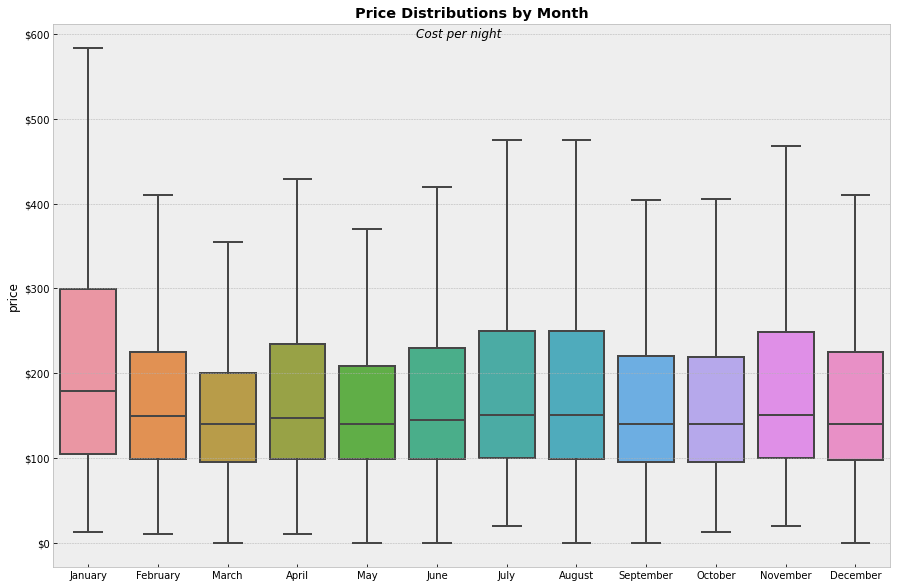

In [9]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'month', y = 'price',
                order = ['January', 'February', 'March' ,'April', 'May', 'June', 'July', 
                         'August' ,'September', 'October' ,'November', 'December'],
                data = time.loc[time['year'] >=2019], showfliers = False,ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Month', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

**Weekday**

Text(0.5, 0, '')

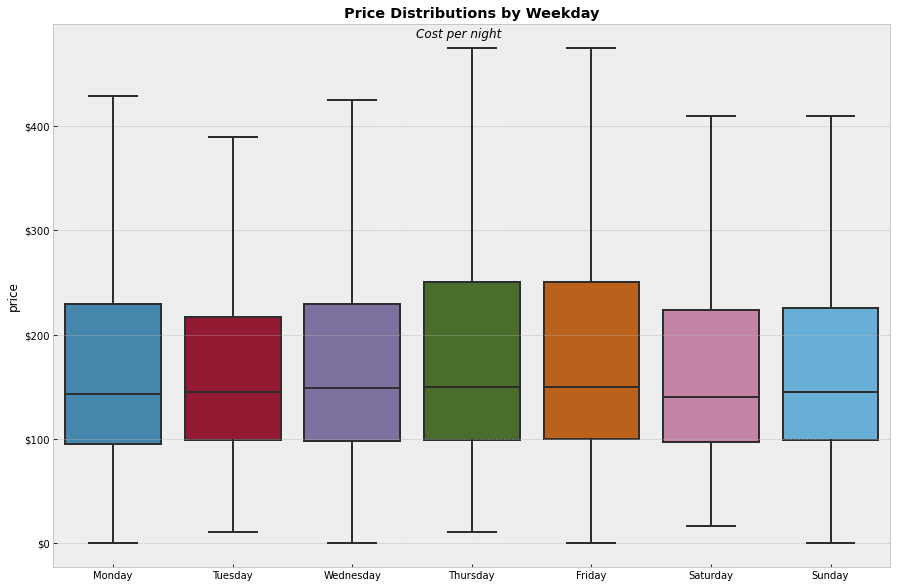

In [10]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'weekday', y = 'price', data =time.loc[time['year'] >=2019], showfliers = False,
                order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'], ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Weekday', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')



### Investigating Prices by neighborhood

In [17]:
#Import geopandas to plot lat, long data
import geopandas as gpd

#Read in Airbnb neighborhoods geojson data
fname = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\References/Airbnb Neighbourhoods.geojson'

#load geojson fit into a pandas df,sort, and view
neighborhoods = gpd.read_file(fname)
neighborhoods.sort_values(by = 'neighbourhood', inplace=True)
display(neighborhoods.head(10))

,neighbourhood,neighbourhood_group,geometry
20,Bayview,None,"MULTIPOLYGON (((-122.38811 37.74780, -122.3881..."
29,Bernal Heights,None,"MULTIPOLYGON (((-122.42825 37.73179, -122.4281..."
27,Castro/Upper Market,None,"MULTIPOLYGON (((-122.44644 37.76104, -122.4464..."
30,Chinatown,None,"MULTIPOLYGON (((-122.40877 37.79016, -122.4088..."
11,Crocker Amazon,None,"MULTIPOLYGON (((-122.42085 37.70833, -122.4238..."
4,Diamond Heights,None,"MULTIPOLYGON (((-122.43553 37.74146, -122.4356..."
3,Downtown/Civic Center,None,"MULTIPOLYGON (((-122.40891 37.79013, -122.4088..."
12,Excelsior,None,"MULTIPOLYGON (((-122.44082 37.71646, -122.4382..."
14,Financial District,None,"MULTIPOLYGON (((-122.39425 37.80007, -122.3942..."
25,Glen Park,None,"MULTIPOLYGON (((-122.42418 37.74226, -122.4239..."


In [18]:
#Assign average rent per night to geo data for plotting
neighborhoods['avg_price']=df.groupby('neighbourhood_cleansed')['price'].mean().values

#Create coords column to plot neighborhood name on visualization
neighborhoods['coords'] = neighborhoods['geometry'].apply(lambda x: x.representative_point().coords[:])
neighborhoods['coords'] = [coords[0] for coords in neighborhoods['coords']]

#Check
display(neighborhoods.head(10))

,neighbourhood,neighbourhood_group,geometry,avg_price,coords
20,Bayview,None,"MULTIPOLYGON (((-122.38811 37.74780, -122.3881...",122.217090,"(-122.38268808592301, 37.730317)"
29,Bernal Heights,None,"MULTIPOLYGON (((-122.42825 37.73179, -122.4281...",189.178019,"(-122.41590699682232, 37.740382999999994)"
27,Castro/Upper Market,None,"MULTIPOLYGON (((-122.44644 37.76104, -122.4464...",252.147581,"(-122.43585763549383, 37.762481)"
30,Chinatown,None,"MULTIPOLYGON (((-122.40877 37.79016, -122.4088...",184.992072,"(-122.40705036483192, 37.7935845)"
11,Crocker Amazon,None,"MULTIPOLYGON (((-122.42085 37.70833, -122.4238...",126.867601,"(-122.43733450367647, 37.7122445)"
4,Diamond Heights,None,"MULTIPOLYGON (((-122.43553 37.74146, -122.4356...",205.930233,"(-122.44062808220588, 37.7410645)"
3,Downtown/Civic Center,None,"MULTIPOLYGON (((-122.40891 37.79013, -122.4088...",197.125249,"(-122.41827825914024, 37.780164)"
12,Excelsior,None,"MULTIPOLYGON (((-122.44082 37.71646, -122.4382...",124.246066,"(-122.41890070326417, 37.7239345)"
14,Financial District,None,"MULTIPOLYGON (((-122.39425 37.80007, -122.3942...",257.800811,"(-122.39691958481856, 37.7910915)"
25,Glen Park,None,"MULTIPOLYGON (((-122.42418 37.74226, -122.4239...",229.415385,"(-122.43249608759353, 37.7379035)"


ImportError: The 'mapclassify' or 'pysal' package is required to use the 'scheme' keyword

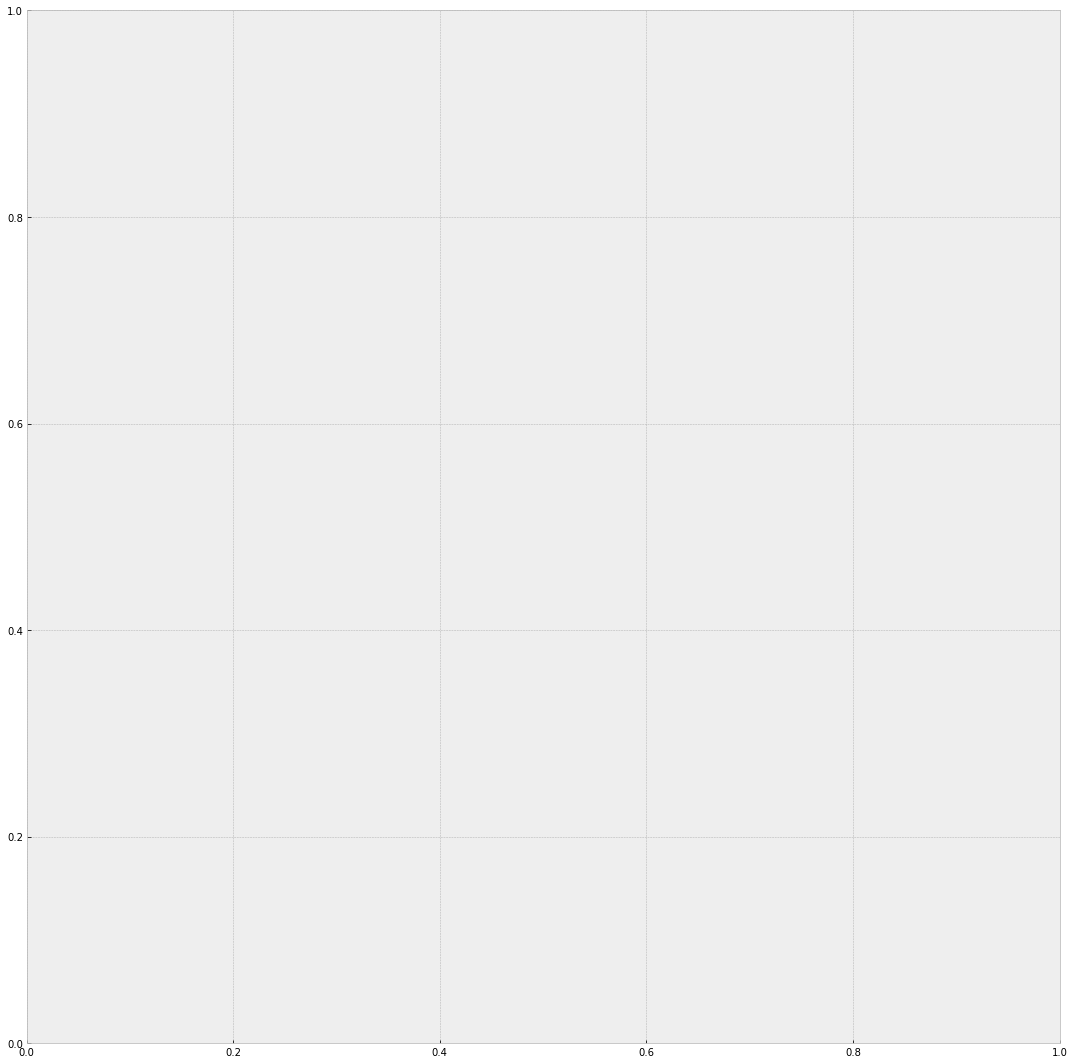

In [19]:
#Plot geodata to reflect average price for a one night stay per neighborhood
ax = neighborhoods.plot(column ='avg_price', legend = True,cmap="BuGn",
                        legend_kwds={'loc': 'right','title': 'Avg Price Range',
                                    'title_fontsize': 15,'facecolor': 'white',
                                      'shadow': True,},
                        scheme = 'quantiles',k=10, figsize=(19,19))

#Append neighborhood name to plot
for idx, row in neighborhoods.iterrows():
    ax.annotate(s=row['neighbourhood'], xy=row['coords'],
                 horizontalalignment='center')

#Set Title dicts and properties for geopandas
from matplotlib.font_manager import FontProperties
fp = FontProperties(size = 16,family="sans-serif", style = 'italic')
geo_dict = {'fontsize':26,
              'fontname':'Arial',
            'fontweight':'semibold'}

#Set plot aesthetics
#Titles
ax.set_title('Average One-Night Airbnb Rental Prices in SF', fontdict = geo_dict)
plt.suptitle('Where are the most affordable neighborhoods to stay?', y = .8, fontproperties=fp)

#Ticks
ax.tick_params(axis='both', which='both',
                bottom = False, left=False,
                labelleft=False, labelbottom=False)

##Saving file to local machine
#Set path 
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Visualizations\01_Listings_EDA_Visualizations'

#Save to Visualizations file
plt.savefig(path + '/Geopandas_Avg_Rental.png', bbox_inches='tight')